In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [41]:
class nn:
    #Specify the number of layers (including the first and last)
    l=3 
     # Specify the number of neurons
    layer_neuron=np.array([784,120,10]) 
    bias = {}
    weights = {}
    a={}
    alpha=0.11
    lamda=0
    
    def sigmoid(self,X):
        X=np.clip(X,-500,500)
        return 1/(1+np.exp(-X))
        
        
    
    def revsigmoid(self,X):
        return X*(1-X)
        
    
    def cost(self,fin_layer,y):
        c=0
        fin_layer1 = np.copy(fin_layer)
        fin_layer1[y]=fin_layer1[y]-1
        c=1/20 * sum(fin_layer1*fin_layer1)
        
        return c  
        
        
    def __init__(self,x,y):
        #np.random.seed(0)
        self.X = x[0:,1:]
        self.X=self.normalise(self.X)
        self.y = x[0:,0]
        self.Xval = y
        self.Xval=self.normalise(self.Xval)  
        
        for i in range(1,self.l):
            self.weights[i]=np.random.randn(self.layer_neuron[i],self.layer_neuron[i-1])*0.05
            self.a[i]=np.random.randn(self.layer_neuron[i],1)
            
            
           
            self.bias[i]=np.random.randn(self.layer_neuron[i],1)*0.1
    
    def normalise(self,X):
        return X/255;
    
    def forward_propagation(self):
        cost_list=[]
        acc_list = []
        k=0
        cor,wr,total=0,0,0
        s=0
        epoch=10
        while(epoch>0):
            s=0
            for inp in self.X:
                #print(inp.shape)
                self.a[0] = np.expand_dims(inp.transpose(),axis=1)

                self.a[1]=self.sigmoid(np.dot(self.weights[1],self.a[0])+self.bias[1])



                for i in range(2,self.l):
                    self.a[i]=self.sigmoid(np.dot(self.weights[i],self.a[i-1])+self.bias[i])


                
                
                
                c=self.cost(self.a[i],self.y[s])
                if(self.output(self.a[i])==self.y[s]):
                        cor=cor+1
                        total=total+1
                        s=s+1
                else:
                        total=total+1
                        s=s+1
                   

                print("Total : ", total, " correct: ", cor , "Accuracy: " , cor/total , " cost ", c)
                
                
                #s=s+1
                self.backprop(self.y[s-1])
                k=k+1
                if(total%1000==0):
                    cost_list.append(c)   
                    acc_list.append(cor/total)
                
                
            epoch=epoch-1
            
        #plt.plot(cost_list)
        plt.plot(acc_list)
        plt.xlabel("Iteration (in thousands)")
        plt.legend(['accuracy'])
        plt.show()
            

            
            
    def backprop(self,y):
        #y=1
        delta={}
        deltab={}
        grad={}
        i=self.l-1
        #print(y,self.a[i])
        temp=np.copy(self.a[i])
        temp[y]=temp[y]-1
        delta[i]=temp*self.revsigmoid(self.a[i])
        deltab[i]=delta[i]
        i=i-1
        while(i>0):
            
            delta[i]=np.dot(self.weights[i+1].transpose(),delta[i+1])*self.revsigmoid(self.a[i]) 
            deltab[i]=delta[i]
            #print(delta[i])
            i=i-1

        i=1
        while(i<self.l):
            
            grad[i]=np.dot(delta[i],self.a[i-1].transpose())
            #print(numpy.isnan(delta[i]).any(),numpy.isnan(self.a[i-1]).any(),numpy.isnan(grad[i]).any())
            i=i+1
            
            
        
        for i in range(1,self.l):
            #print(numpy.isnan(self.weights[i]).any(),1)
            self.weights[i]=(1-self.alpha*self.lamda)*self.weights[i]-self.alpha*grad[i]
            #print(numpy.isnan(self.weights[i]).any(),2)
            self.bias[i]=self.bias[i]-self.alpha*deltab[i]    
            
        #print("BP-DONE")
        
   
    def valid(self):
        cor,wr,total=0,0,0
        a=[]
        for inp in self.Xval:
            self.a[0] = np.expand_dims(inp.transpose(),axis=1)
            self.a[1]=np.dot(self.weights[1],self.a[0])
            self.a[1]=self.sigmoid(self.a[1])
            for i in range(2,self.l):
                self.a[i]=self.sigmoid(np.dot(self.weights[i],self.a[i-1])+self.bias[i])
                
            a.append(self.output(self.a[i]))
        
        filename="output.csv"
        with open(filename, 'w') as csvfile: 
# creating a csv writer object 
            csvwriter = csv.writer(csvfile) 

# writing the fields 
            csvwriter.writerow(["id","label"]) 

# writing the data rows 
            for i in range(len(a)):
                csvwriter.writerows([[i+1,a[i]]])
                
               
                    
    def output(self,fin_layer):
        #print(fin_layer)
        k,m=0,0
        m=fin_layer[0]
        for i in range(1,10):
            if(m<fin_layer[i]):
                m=fin_layer[i]
                k=i
                
        return k
            
            
            
        
            
            
    

In [3]:
df = pd.read_csv('mnist_train.csv',sep=',',header=None)
d = pd.read_csv('mnist_test.csv',sep=',',header=None)

In [19]:
X=df.values
Y=d.values
print(Y.shape)

(3000, 784)


In [43]:
mynet = nn(X,Y)

Streaming output truncated to the last 5000 lines.
Total :  65002  correct:  59267 Accuracy:  0.9117719454786006  cost  [0.00014279]
Total :  65003  correct:  59267 Accuracy:  0.9117579188652831  cost  [0.07436778]
Total :  65004  correct:  59268 Accuracy:  0.9117592763522244  cost  [0.00140962]
Total :  65005  correct:  59269 Accuracy:  0.9117606337974002  cost  [2.0784167e-05]
Total :  65006  correct:  59270 Accuracy:  0.9117619912008122  cost  [0.00116386]
Total :  65007  correct:  59271 Accuracy:  0.9117633485624626  cost  [1.52604966e-06]
Total :  65008  correct:  59272 Accuracy:  0.9117647058823529  cost  [1.15677366e-05]
Total :  65009  correct:  59273 Accuracy:  0.9117660631604855  cost  [0.00012805]
Total :  65010  correct:  59273 Accuracy:  0.9117520381479772  cost  [0.05035633]
Total :  65011  correct:  59274 Accuracy:  0.9117533955792096  cost  [3.08701442e-05]
Total :  65012  correct:  59274 Accuracy:  0.9117393711930105  cost  [0.05299838]
Total :  65013  correct:  59275 

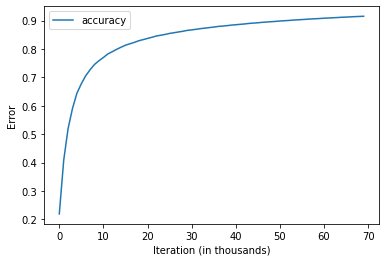

In [44]:
mynet.forward_propagation()
#mynet.valid()
